In [ ]:
!pip install pandas scikit-learn

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error




In [ ]:
data = pd.read_csv('/content/df.csv')
data.info()

In [19]:

from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator


data['order_time'] = pd.to_datetime(data['order_time'])
data.set_index('order_time', inplace=True)
daily_sales = data.groupby(pd.Grouper(freq='D')).size()

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(daily_sales.values.reshape(-1, 1))

# Split data
split_percent = 0.8
split = int(split_percent*len(scaled_data))

train_data = scaled_data[:split]
test_data = scaled_data[split:]

look_back = 5
train_generator = TimeseriesGenerator(train_data, train_data, length=look_back, batch_size=1)
test_generator = TimeseriesGenerator(test_data, test_data, length=look_back, batch_size=1)


In [20]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [21]:
# Train the model
model.fit(train_generator, epochs=10, verbose=1)


Epoch 1/10
281/281 [==============================] - 4s 7ms/step - loss: 0.0396
Epoch 2/10
281/281 [==============================] - 1s 4ms/step - loss: 0.0387
Epoch 3/10
281/281 [==============================] - 2s 7ms/step - loss: 0.0384
Epoch 4/10
281/281 [==============================] - 1s 4ms/step - loss: 0.0386
Epoch 5/10
281/281 [==============================] - 2s 7ms/step - loss: 0.0383
Epoch 6/10
281/281 [==============================] - 2s 6ms/step - loss: 0.0383
Epoch 7/10
281/281 [==============================] - 1s 4ms/step - loss: 0.0383
Epoch 8/10
281/281 [==============================] - 1s 4ms/step - loss: 0.0383
Epoch 9/10
281/281 [==============================] - 1s 4ms/step - loss: 0.0382
Epoch 10/10
281/281 [==============================] - 1s 4ms/step - loss: 0.0382


In [22]:
# Predictions
prediction = model.predict(test_generator)


prediction = scaler.inverse_transform(prediction)
actual_sales = scaler.inverse_transform(test_data[look_back:])


67/67 [==============================] - 0s 2ms/step


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(actual_sales, label='Actual Sales')
plt.plot(prediction, label='Predicted Sales', color='red')
plt.title('LSTM Sales Forecast vs Actual Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# RMSE calculation
rmse = sqrt(mean_squared_error(actual_sales, prediction))
print("RMSE: ", rmse)

RMSE:  0.6123724228891194


In [25]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE
mae = mean_absolute_error(actual_sales, prediction)
print("MAE: ", mae)


MAE:  0.49483251616136353


<ipython-input-2-8472f279b2f8>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


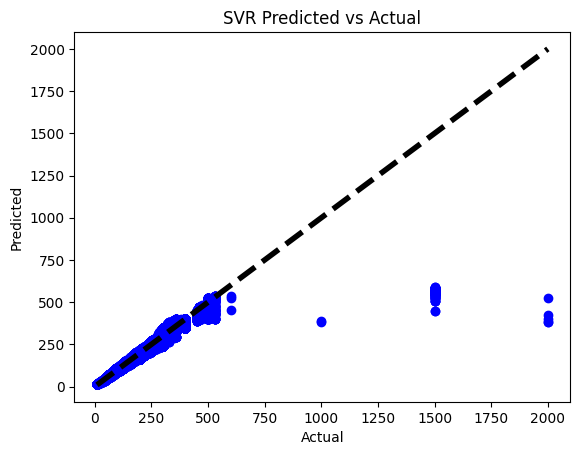

In [2]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


df = pd.read_csv('/content/DataCoSupplyChainDataset.csv', encoding="ISO-8859-1")


X = df[['Order Item Total']]
y = df['Sales']


X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svr = SVR(kernel='rbf')

svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)


rmse = mean_squared_error(y_test, y_pred, squared=False)

plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVR Predicted vs Actual')
plt.show()



47.327847928294


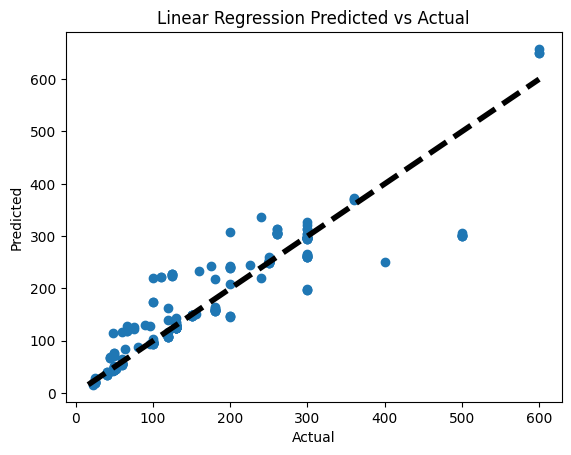

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


df = pd.read_csv('/content/DataCoSupplyChainDataset.csv', encoding="ISO-8859-1")




X = df[['Sum of Order Item Quantity', 'Sum of Order Item Product Price', 'Sum of Order Item Profit Ratio']]
y = df['Sum of Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


y_pred = lr_model.predict(X_test)


rmse = mean_squared_error(y_test, y_pred, squared=False)


plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression Predicted vs Actual')
plt.show()




In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

import os
dataco_supply_chain = pd.read_csv('/content/DataCoSupplyChainDataset.csv', encoding="ISO-8859-1")


In [ ]:
dataco_supply_chain.columns = dataco_supply_chain.columns.str.upper().str.replace(' ', '_')
dataco_supply_chain.head()

In [13]:
dataco_supply_chain.columns = dataco_supply_chain.columns.str.upper().str.replace(' ', '_')
dataco_supply_chain = dataco_supply_chain[
    ['ORDER_DATE_(DATEORDERS)'
     , 'CATEGORY_NAME','CATEGORY_ID'
     ,'ORDER_ITEM_QUANTITY'
     ,'ORDER_REGION'
     ,'ORDER_STATUS'
     ,'PRODUCT_NAME','PRODUCT_CARD_ID'
     ,'DAYS_FOR_SHIPPING_(REAL)','DAYS_FOR_SHIPMENT_(SCHEDULED)'
     ,
    ]
]

In [14]:
dataco_supply_chain['ORDER_DATE_(DATEORDERS)'] = pd.to_datetime(dataco_supply_chain['ORDER_DATE_(DATEORDERS)'])

In [ ]:
dataco_supply_chain['ORDER_YEAR'] = dataco_supply_chain['ORDER_DATE_(DATEORDERS)'].dt.year
dataco_supply_chain['ORDER_MONTH'] = dataco_supply_chain['ORDER_DATE_(DATEORDERS)'].dt.month
dataco_supply_chain['ORDER_DAY'] = dataco_supply_chain['ORDER_DATE_(DATEORDERS)'].dt.day
dataco_supply_chain['ORDER_WEEKDAY'] = dataco_supply_chain['ORDER_DATE_(DATEORDERS)'].dt.weekday
dataco_supply_chain['ORDER_DATE'] = dataco_supply_chain['ORDER_DATE_(DATEORDERS)'].dt.date
dataco_supply_chain.drop(columns='ORDER_DATE_(DATEORDERS)', inplace=True)
dataco_supply_chain.info()

In [16]:
dataco_supply_chain.describe(datetime_is_numeric=True).round(2)

,CATEGORY_ID,ORDER_ITEM_QUANTITY,PRODUCT_CARD_ID,DAYS_FOR_SHIPPING_(REAL),DAYS_FOR_SHIPMENT_(SCHEDULED),ORDER_YEAR,ORDER_MONTH,ORDER_DAY,ORDER_WEEKDAY
count,180519.00,180519.00,180519.00,180519.00,180519.00,180519.00,180519.00,180519.00,180519.00
mean,31.85,2.13,692.51,3.50,2.93,2015.97,6.24,15.74,3.01
std,15.64,1.45,336.45,1.62,1.37,0.83,3.40,8.82,2.00
min,2.00,1.00,19.00,0.00,0.00,2015.00,1.00,1.00,0.00
25%,18.00,1.00,403.00,2.00,2.00,2015.00,3.00,8.00,1.00
50%,29.00,1.00,627.00,3.00,4.00,2016.00,6.00,16.00,3.00
75%,45.00,3.00,1004.00,5.00,4.00,2017.00,9.00,23.00,5.00
max,76.00,5.00,1363.00,6.00,4.00,2018.00,12.00,31.00,6.00


<Figure size 1000x600 with 0 Axes>

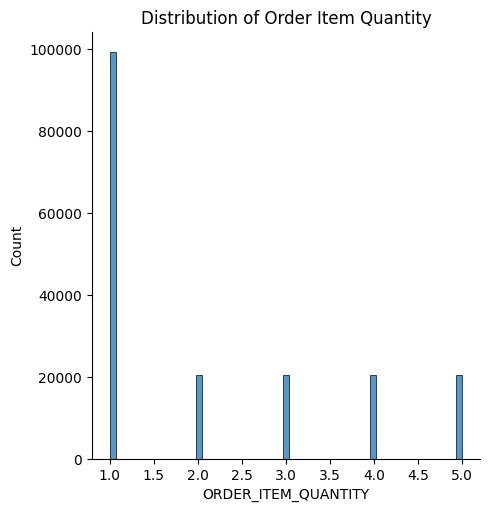

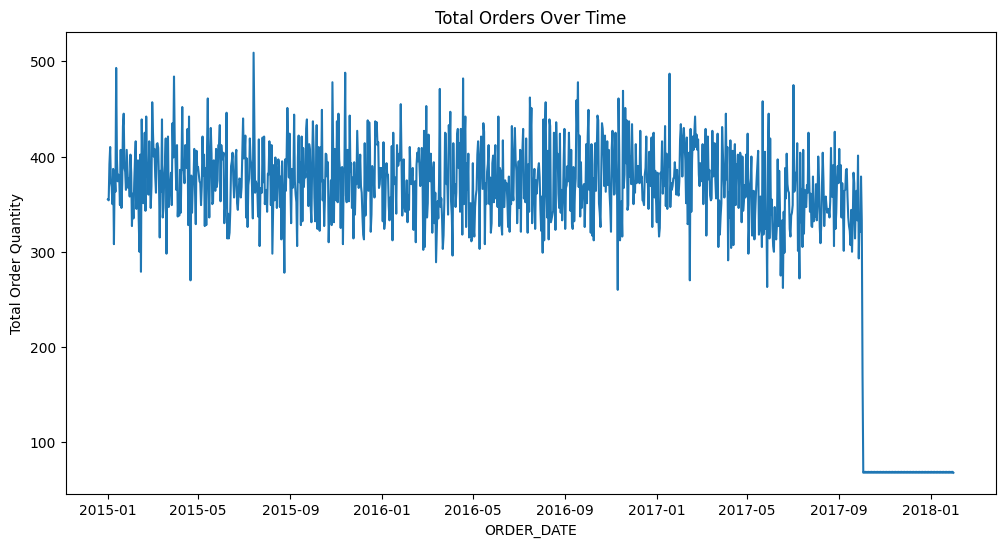

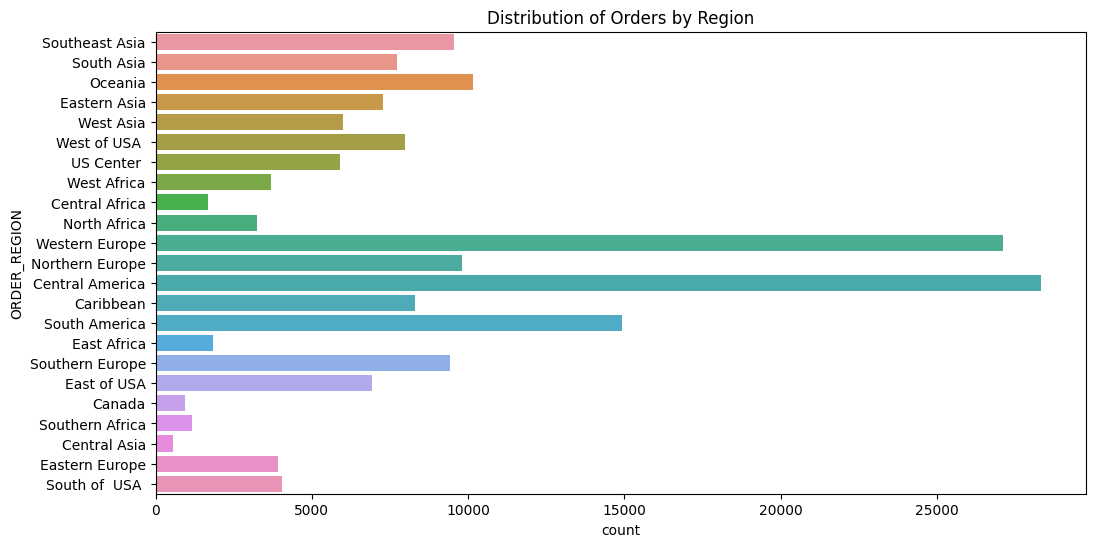

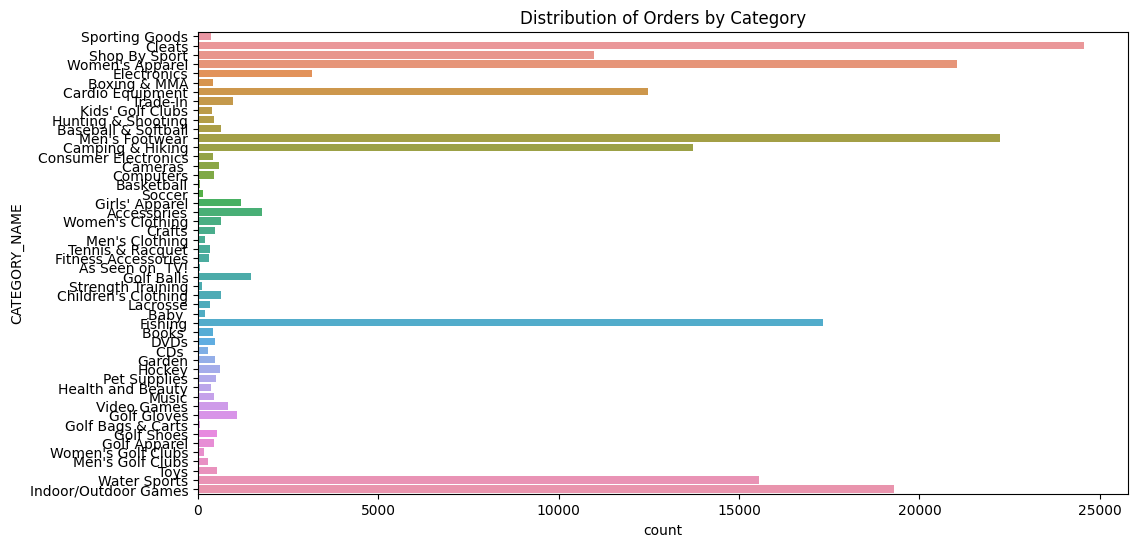

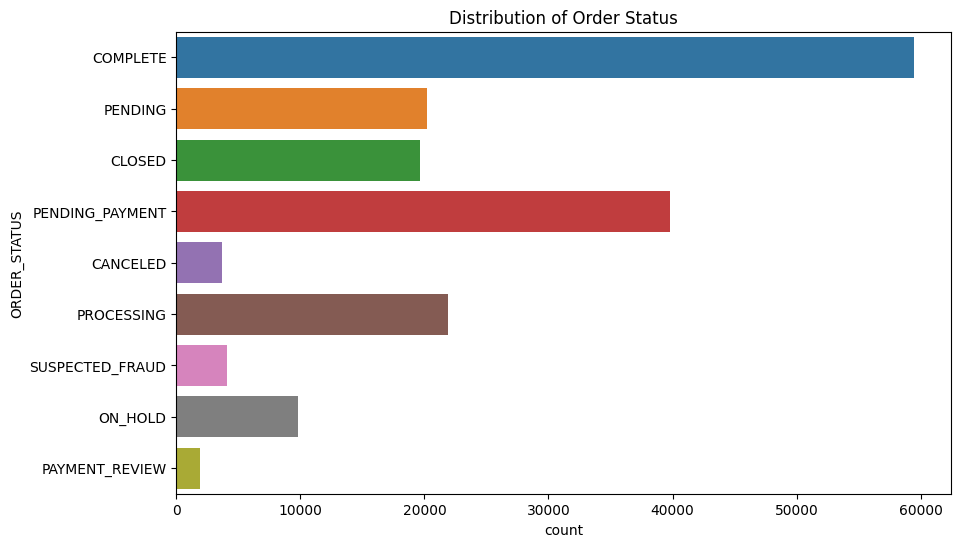

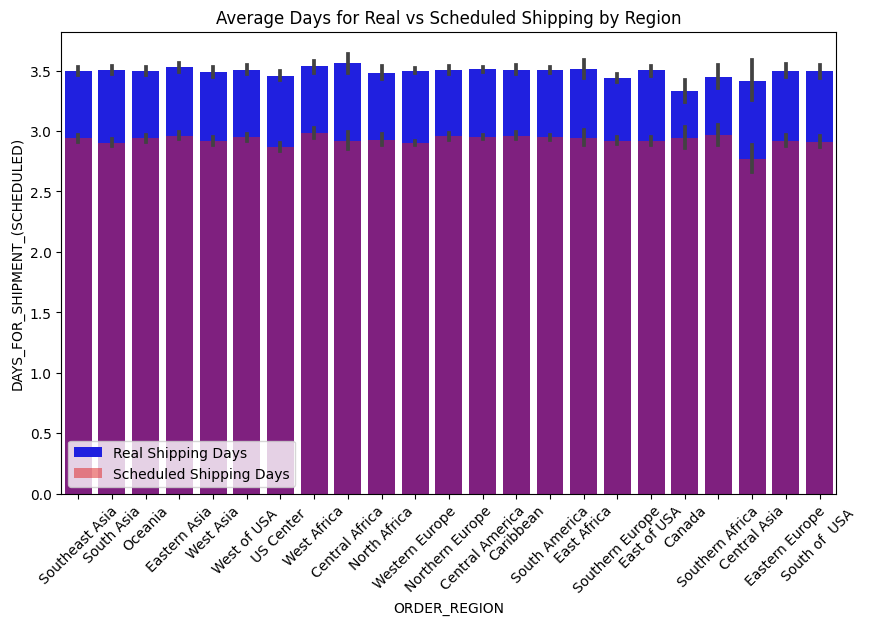

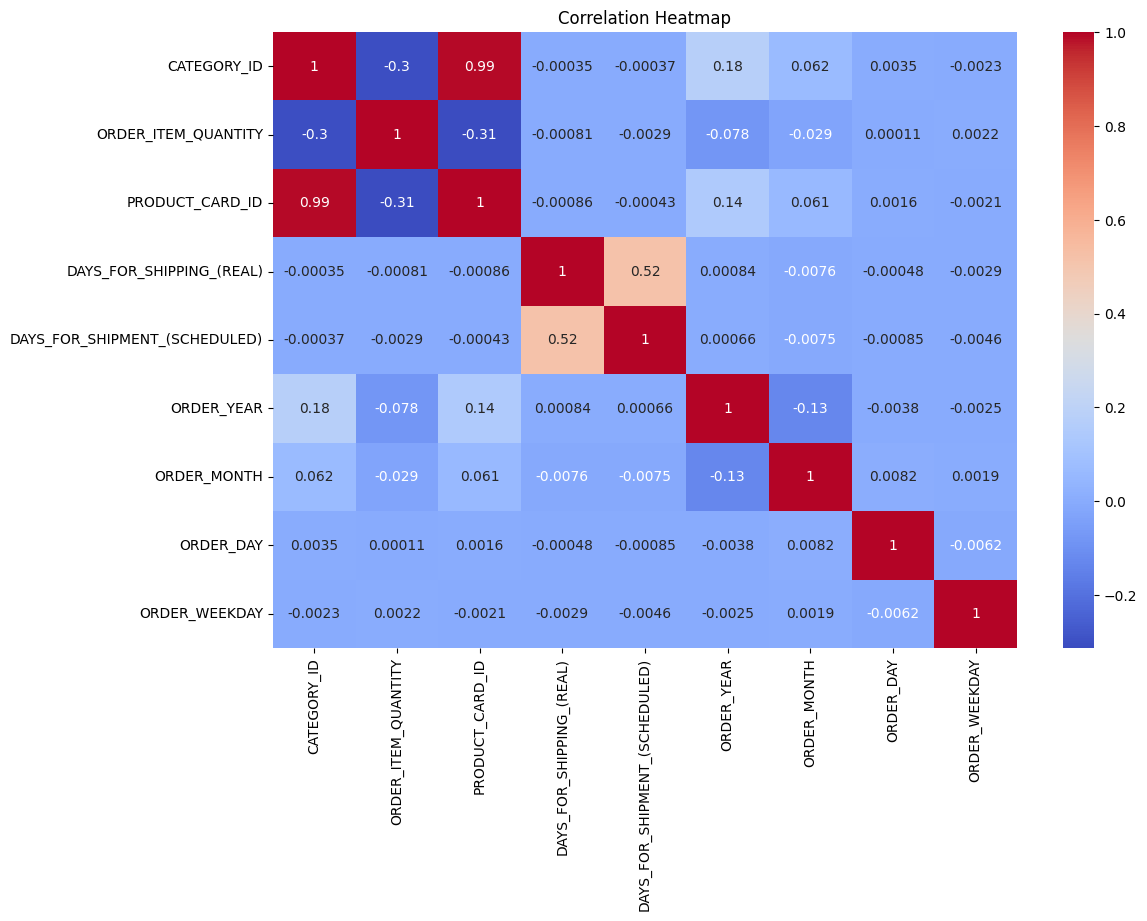

In [17]:
plt.figure(figsize=(10, 6))
sns.displot(dataco_supply_chain['ORDER_ITEM_QUANTITY'])
plt.title('Distribution of Order Item Quantity')
plt.show()


plt.figure(figsize=(12, 6))
dataco_supply_chain.groupby('ORDER_DATE')['ORDER_ITEM_QUANTITY'].sum().plot()
plt.title('Total Orders Over Time')
plt.ylabel('Total Order Quantity')
plt.show()


plt.figure(figsize=(12, 6))
sns.countplot(data=dataco_supply_chain, y='ORDER_REGION')
plt.title('Distribution of Orders by Region')
plt.show()


plt.figure(figsize=(12, 6))
sns.countplot(data=dataco_supply_chain, y='CATEGORY_NAME')
plt.title('Distribution of Orders by Category')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(data=dataco_supply_chain, y='ORDER_STATUS')
plt.title('Distribution of Order Status')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(data=dataco_supply_chain, x='ORDER_REGION', y='DAYS_FOR_SHIPPING_(REAL)', color='blue', label='Real Shipping Days')
sns.barplot(data=dataco_supply_chain, x='ORDER_REGION', y='DAYS_FOR_SHIPMENT_(SCHEDULED)', color='red', alpha=0.5, label='Scheduled Shipping Days')
plt.title('Average Days for Real vs Scheduled Shipping by Region')
plt.legend()
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(12, 8))
sns.heatmap(dataco_supply_chain.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

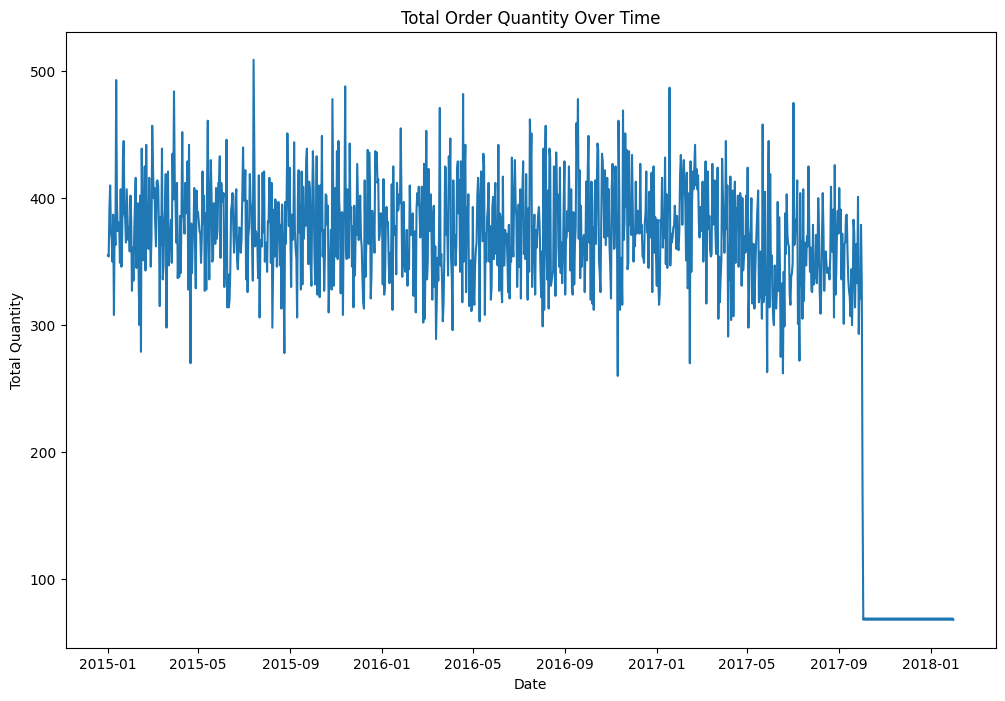

In [18]:
plt.figure(figsize=(12, 8))
daily_orders = dataco_supply_chain.groupby(['ORDER_DATE'])['ORDER_ITEM_QUANTITY'].sum().reset_index()
sns.lineplot(data=daily_orders, x='ORDER_DATE', y='ORDER_ITEM_QUANTITY')
plt.title('Total Order Quantity Over Time')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.show()

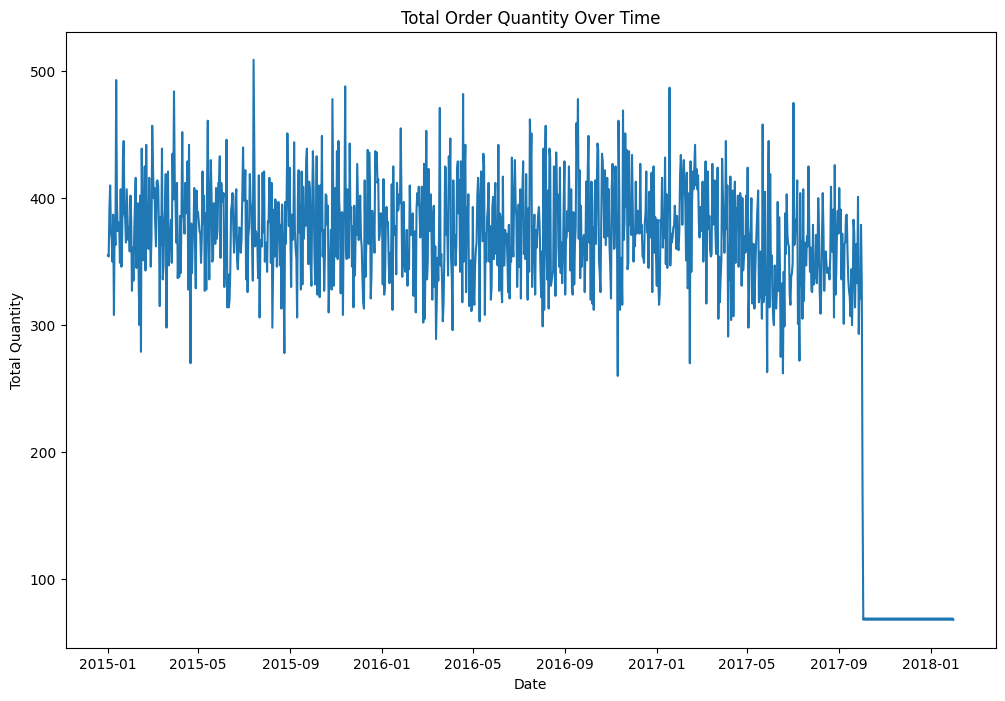

In [19]:

plt.figure(figsize=(12, 8))
filtered_daily_orders = daily_orders.copy()

sns.lineplot(data=filtered_daily_orders, x='ORDER_DATE', y='ORDER_ITEM_QUANTITY')
plt.title('Total Order Quantity Over Time')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.show()

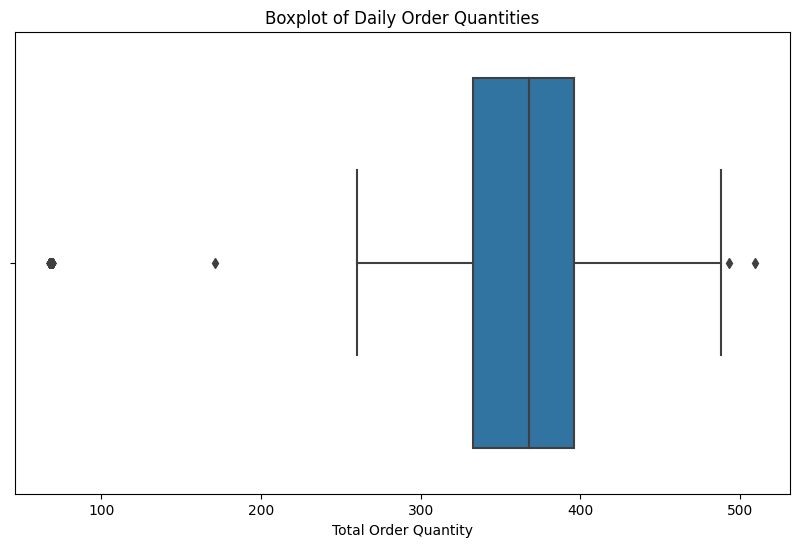

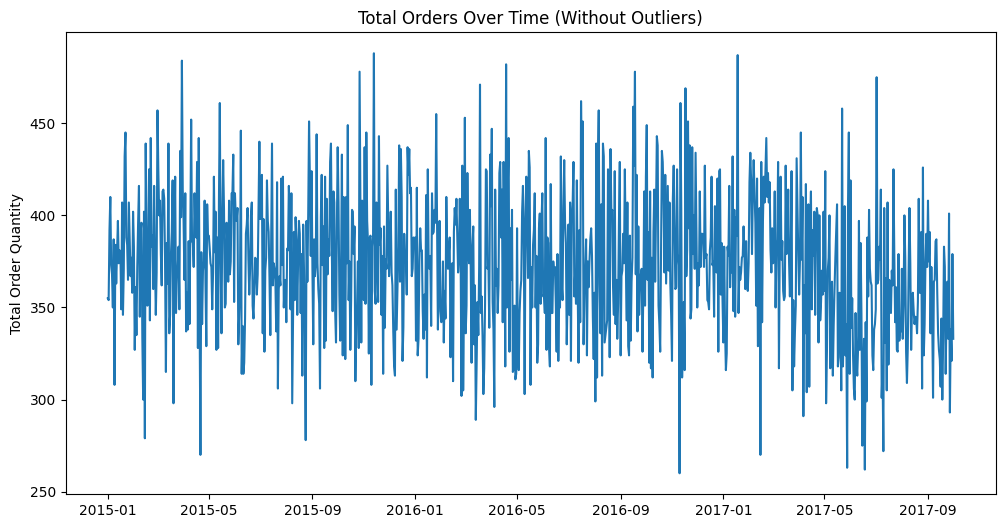

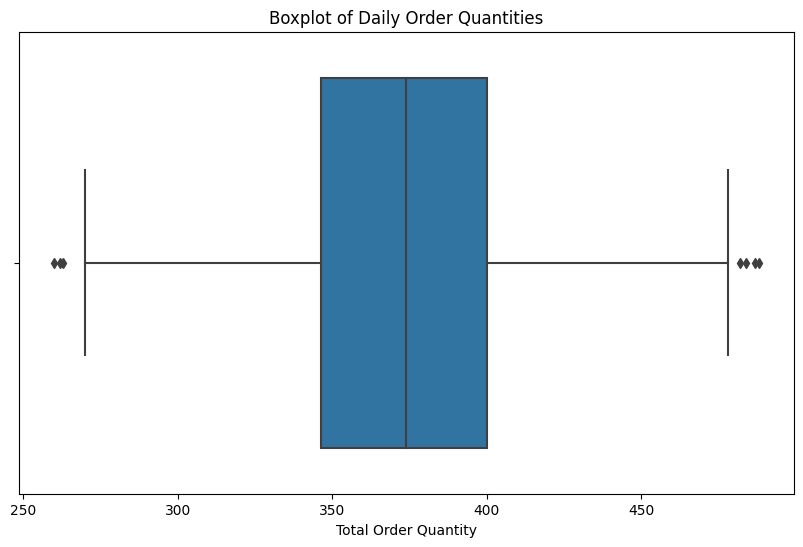

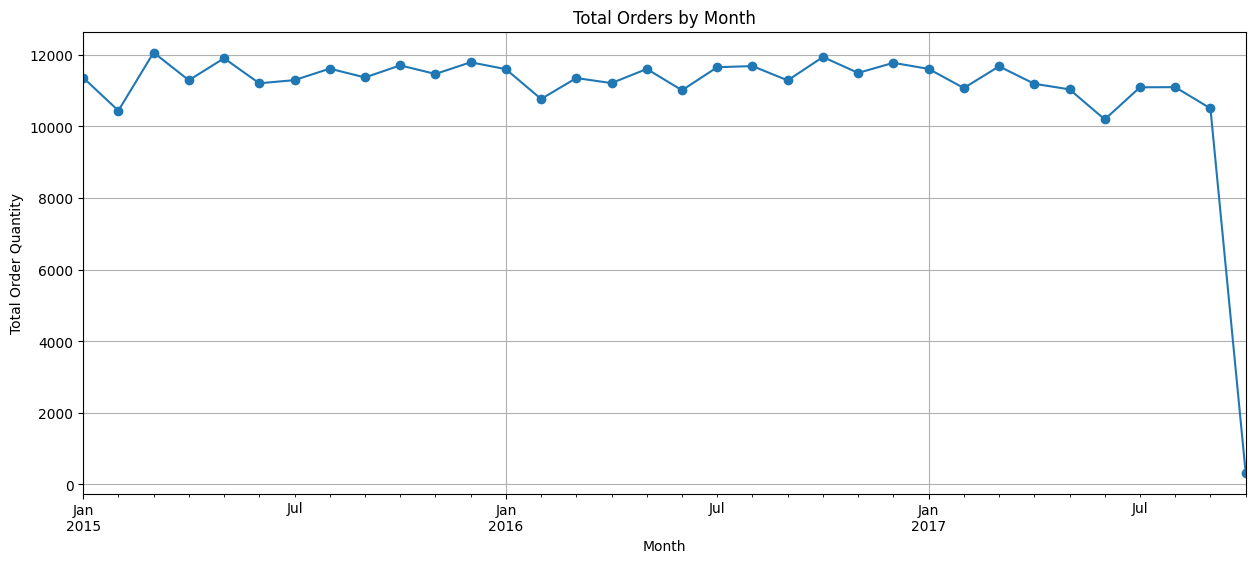

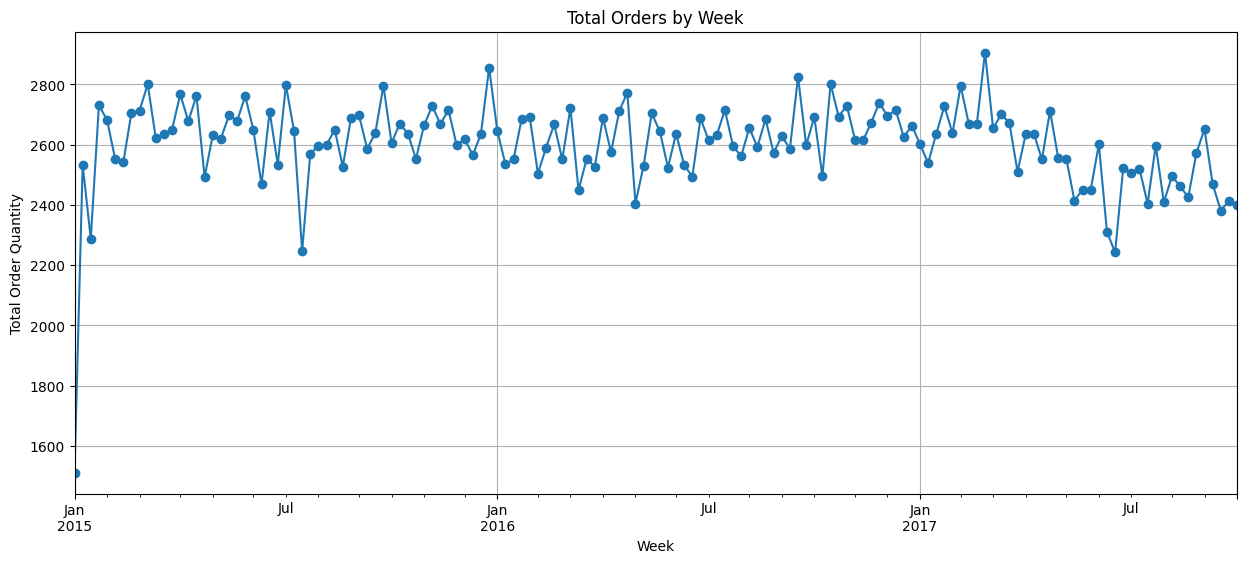

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_daily_orders['ORDER_ITEM_QUANTITY'])
plt.title('Boxplot of Daily Order Quantities')
plt.xlabel('Total Order Quantity')
plt.show()




Q1 = filtered_daily_orders['ORDER_ITEM_QUANTITY'].quantile(0.25)
Q3 = filtered_daily_orders['ORDER_ITEM_QUANTITY'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


cleaned_daily_orders = filtered_daily_orders[(filtered_daily_orders['ORDER_ITEM_QUANTITY'] >= lower_bound) &
                               (filtered_daily_orders['ORDER_ITEM_QUANTITY'] <= upper_bound)]

plt.figure(figsize=(12, 6))
plt.plot(cleaned_daily_orders['ORDER_DATE'], cleaned_daily_orders['ORDER_ITEM_QUANTITY'])
plt.title('Total Orders Over Time (Without Outliers)')
plt.ylabel('Total Order Quantity')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x=cleaned_daily_orders['ORDER_ITEM_QUANTITY'])
plt.title('Boxplot of Daily Order Quantities')
plt.xlabel('Total Order Quantity')
plt.show()






cleaned_daily_orders = cleaned_daily_orders.copy()
cleaned_daily_orders['ORDER_DATE'] = pd.to_datetime(cleaned_daily_orders['ORDER_DATE'])
cleaned_daily_orders['YEAR_MONTH']=cleaned_daily_orders['ORDER_DATE'].dt.to_period('M')
cleaned_daily_orders['YEAR_WEEK']=cleaned_daily_orders['ORDER_DATE'].dt.to_period('W')
cleaned_daily_orders






monthly_orders = cleaned_daily_orders.groupby('YEAR_MONTH')['ORDER_ITEM_QUANTITY'].sum()
weekly_orders = cleaned_daily_orders.groupby('YEAR_WEEK')['ORDER_ITEM_QUANTITY'].sum()

# Plot
plt.figure(figsize=(15, 6))
monthly_orders.plot(kind='line', marker='o')
plt.title('Total Orders by Month')
plt.ylabel('Total Order Quantity')
plt.xlabel('Month')
plt.grid(True)
plt.show()

# Plot
plt.figure(figsize=(15, 6))
weekly_orders.plot(kind='line', marker='o')
plt.title('Total Orders by Week')
plt.ylabel('Total Order Quantity')
plt.xlabel('Week')
plt.grid(True)
plt.show()

In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


weekly_orders_df = weekly_orders.reset_index()
weekly_orders_df.columns = ['ds', 'y']


weekly_orders_df['ds'] = weekly_orders_df['ds'].dt.to_timestamp()

# Split the data (holding out the last 20% for testing)
split_point = int(len(weekly_orders_df) * 0.80)
train = weekly_orders_df.iloc[:split_point]
test = weekly_orders_df.iloc[split_point:]


weekly_model = Prophet()
weekly_model.fit(train)

weekly_future = weekly_model.make_future_dataframe(periods=len(test), freq='W-SUN')


weekly_forecast = weekly_model.predict(weekly_future)

In [28]:

y_pred_train = weekly_forecast['yhat'][:split_point]
mae_train = mean_absolute_error(train['y'], y_pred_train)
mse_train = mean_squared_error(train['y'], y_pred_train)
rmse_train = np.sqrt(mse_train)

print(f"Training MAE: {mae_train}")
print(f"Training MSE: {mse_train}")
print(f"Training RMSE: {rmse_train}")


y_pred_test = weekly_forecast['yhat'][split_point:]
mae_test = mean_absolute_error(test['y'], y_pred_test)
mse_test = mean_squared_error(test['y'], y_pred_test)
rmse_test = np.sqrt(mse_test)

print(f"\nTesting MAE: {mae_test}")
print(f"Testing MSE: {mse_test}")
print(f"Testing RMSE: {rmse_test}")

Training MAE: 80.91498435500249
Training MSE: 15123.84649509512
Training RMSE: 122.97904900874425

Testing MAE: 176.43129560082463
Testing MSE: 43016.18534737345
Testing RMSE: 207.40343619953228


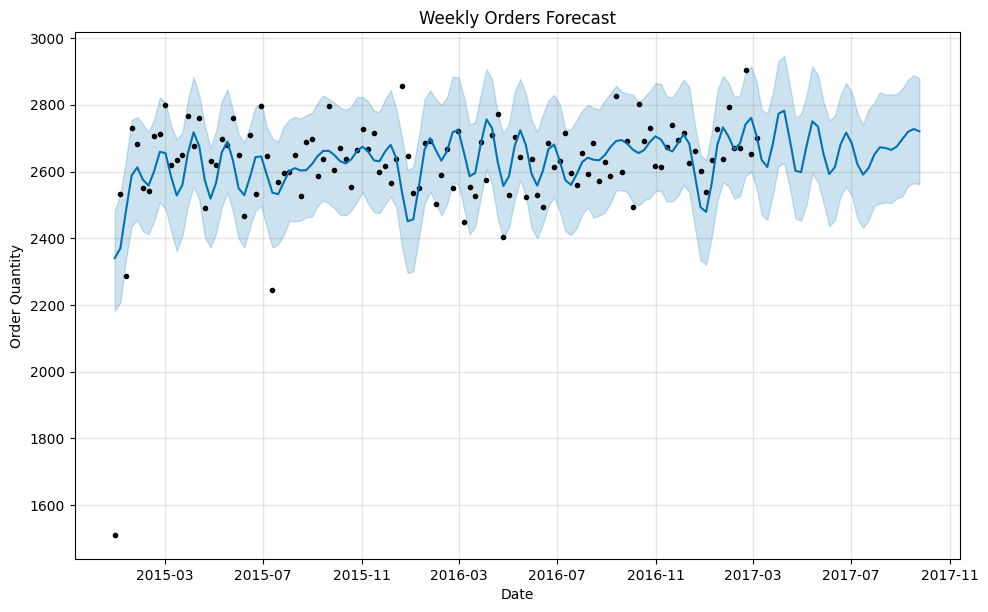

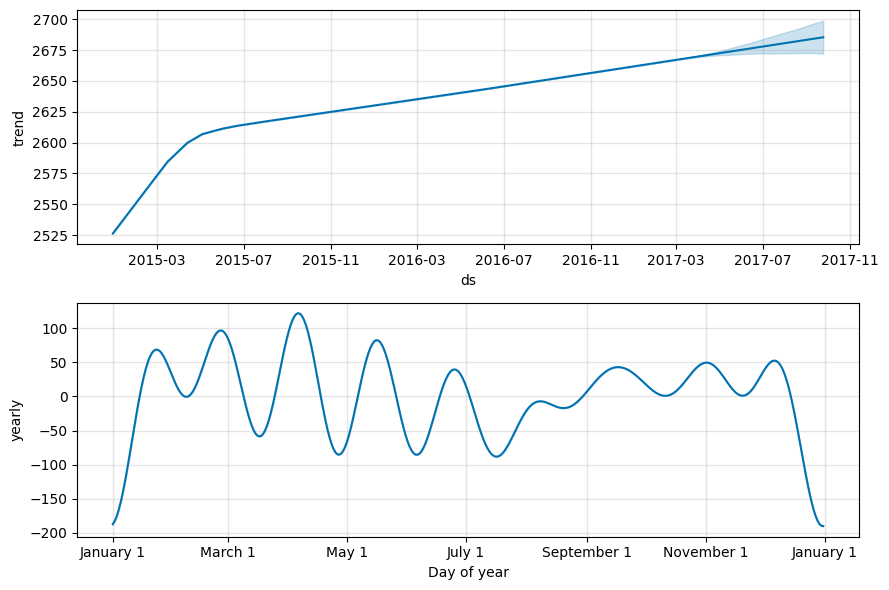

In [29]:

weekly_fig1 = weekly_model.plot(weekly_forecast)
plt.title('Weekly Orders Forecast')
plt.xlabel('Date')
plt.ylabel('Order Quantity')
plt.show()

weekly_fig2 = weekly_model.plot_components(weekly_forecast)

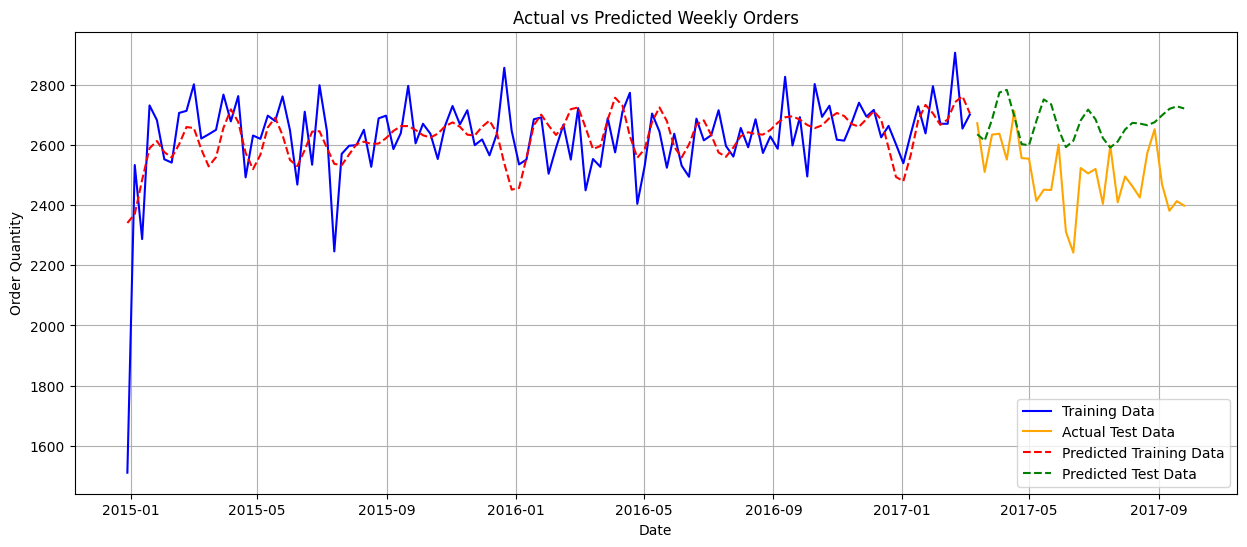

In [30]:

plt.figure(figsize=(15, 6))
plt.plot(train['ds'], train['y'], label='Training Data', color='blue')
plt.plot(test['ds'], test['y'], label='Actual Test Data', color='orange')
plt.plot(train['ds'], y_pred_train, label='Predicted Training Data', color='red', linestyle='--')
plt.plot(test['ds'], y_pred_test, label='Predicted Test Data', color='green', linestyle='--')
plt.title('Actual vs Predicted Weekly Orders')
plt.xlabel('Date')
plt.ylabel('Order Quantity')
plt.legend()
plt.grid(True)
plt.show()